# Red Wine prediction

## Description

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Pandas** is a useful library in data analysis, **Numpy** library used for working with arrays, **Seaborn** and **Matplotlib** are used in data visualization.

### Loading Dataset

In [2]:
rw=pd.read_csv("Red Wine Quality Prediction.csv")

In [3]:
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the data dimension
rw.shape

(1599, 12)

We have 1599 rows and 12 columns including the target column

In [5]:
rw.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking info
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#checking Datetypes
rw.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
#checking null values
rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: There is 0 NaN value

In [9]:
#statistical summary
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
rw['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

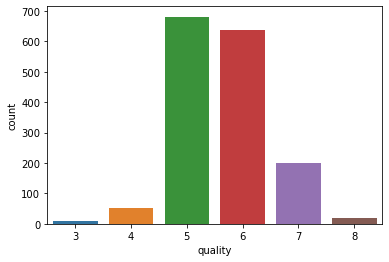

In [11]:
sns.countplot(x='quality', data=rw)

Observation: we have 6 types of Wine Qualities in the above Dataset

####  Spliting the quality column into "good" and "bad"

In [12]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
rw['quality'] = pd.cut(rw['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
rw['quality'] = label_quality.fit_transform(rw['quality'])
rw['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

After Converting there are only 2 types of Wine qualities i.e, 0 and 1.

In [13]:
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [14]:
rw['quality'].value_counts


<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32>

Observation: Now we have 2 types of Wine Qualities 0-"830" and 1="109".

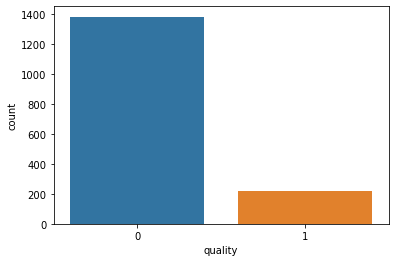

In [15]:
sns.countplot(x='quality', data=rw)

### Single Variate Analysis

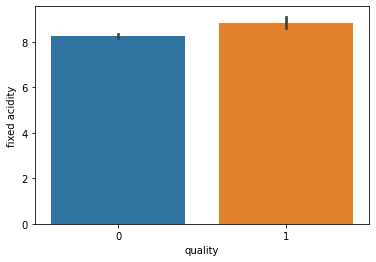

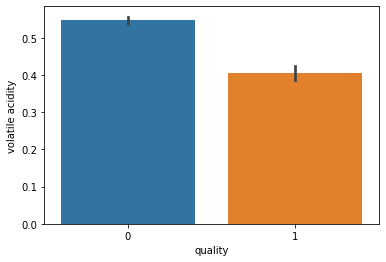

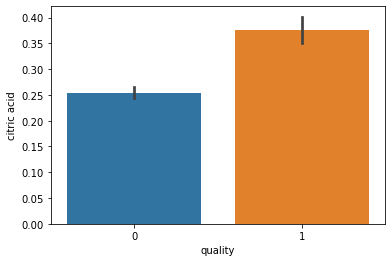

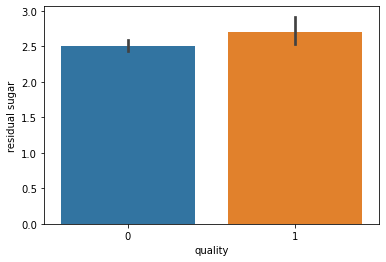

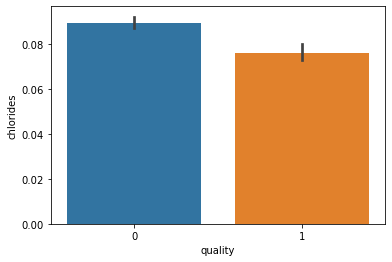

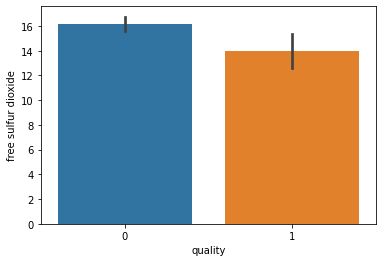

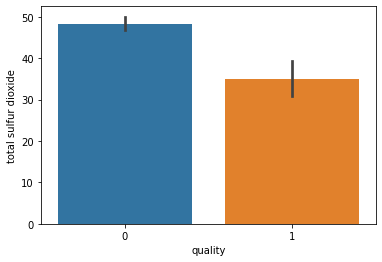

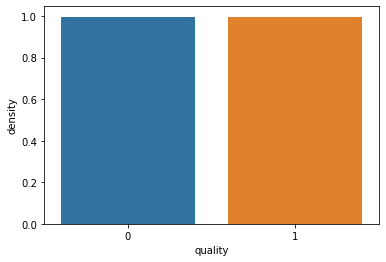

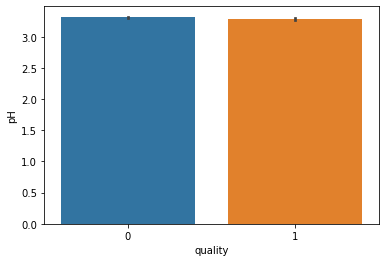

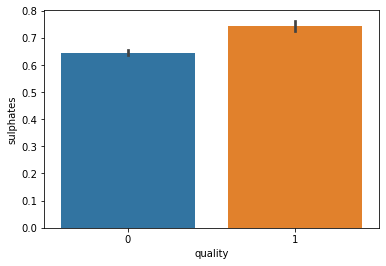

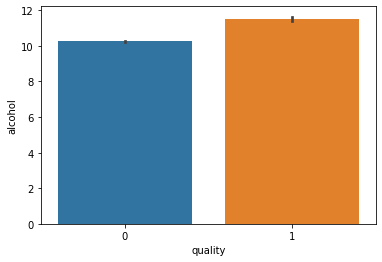

In [16]:
# generating charts that compare all of the independent variables with quality variable
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=rw)

Fixed acidity: Fixed Acidity vs Quality we can note that once fixed acidity increases the Quality of wine improves.

Volatile acidity: From this distribution we can say that once Volatile Acidity decreases the Wine Quality Improves.

Critic acid: It clearly shows that once the value of Citric Acid increases we are getting best quality of Wine.

Residual sugar: From this distribution we can say that once residual sugar increases the Wine Quality Improves.

Chlorides: From above graph we can clearly see that Decrease in Chlorides corresponds to better Wine quality.

Free sugar dioxide: From this distribution we can say that once Free sugar dioxide decreases the Wine Quality Improves.

Total sulfur dioxide: From this distribution we can say that once Total sulfur dioxide decreases the Wine Quality Improves.

Density: Density of all wines are nearly same so it can not be used for discriminating quality of Wine.

pH: Density of all wines are nearly same so it can not be used for discriminating quality of Wine.

Sulphates: From the graph it is clear that once the value of Sulphates increase quality of wine also improves.

Alcohol: From the graph it is clear that once the value of alcohal increase quality of wine also improves

### Multi Variate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

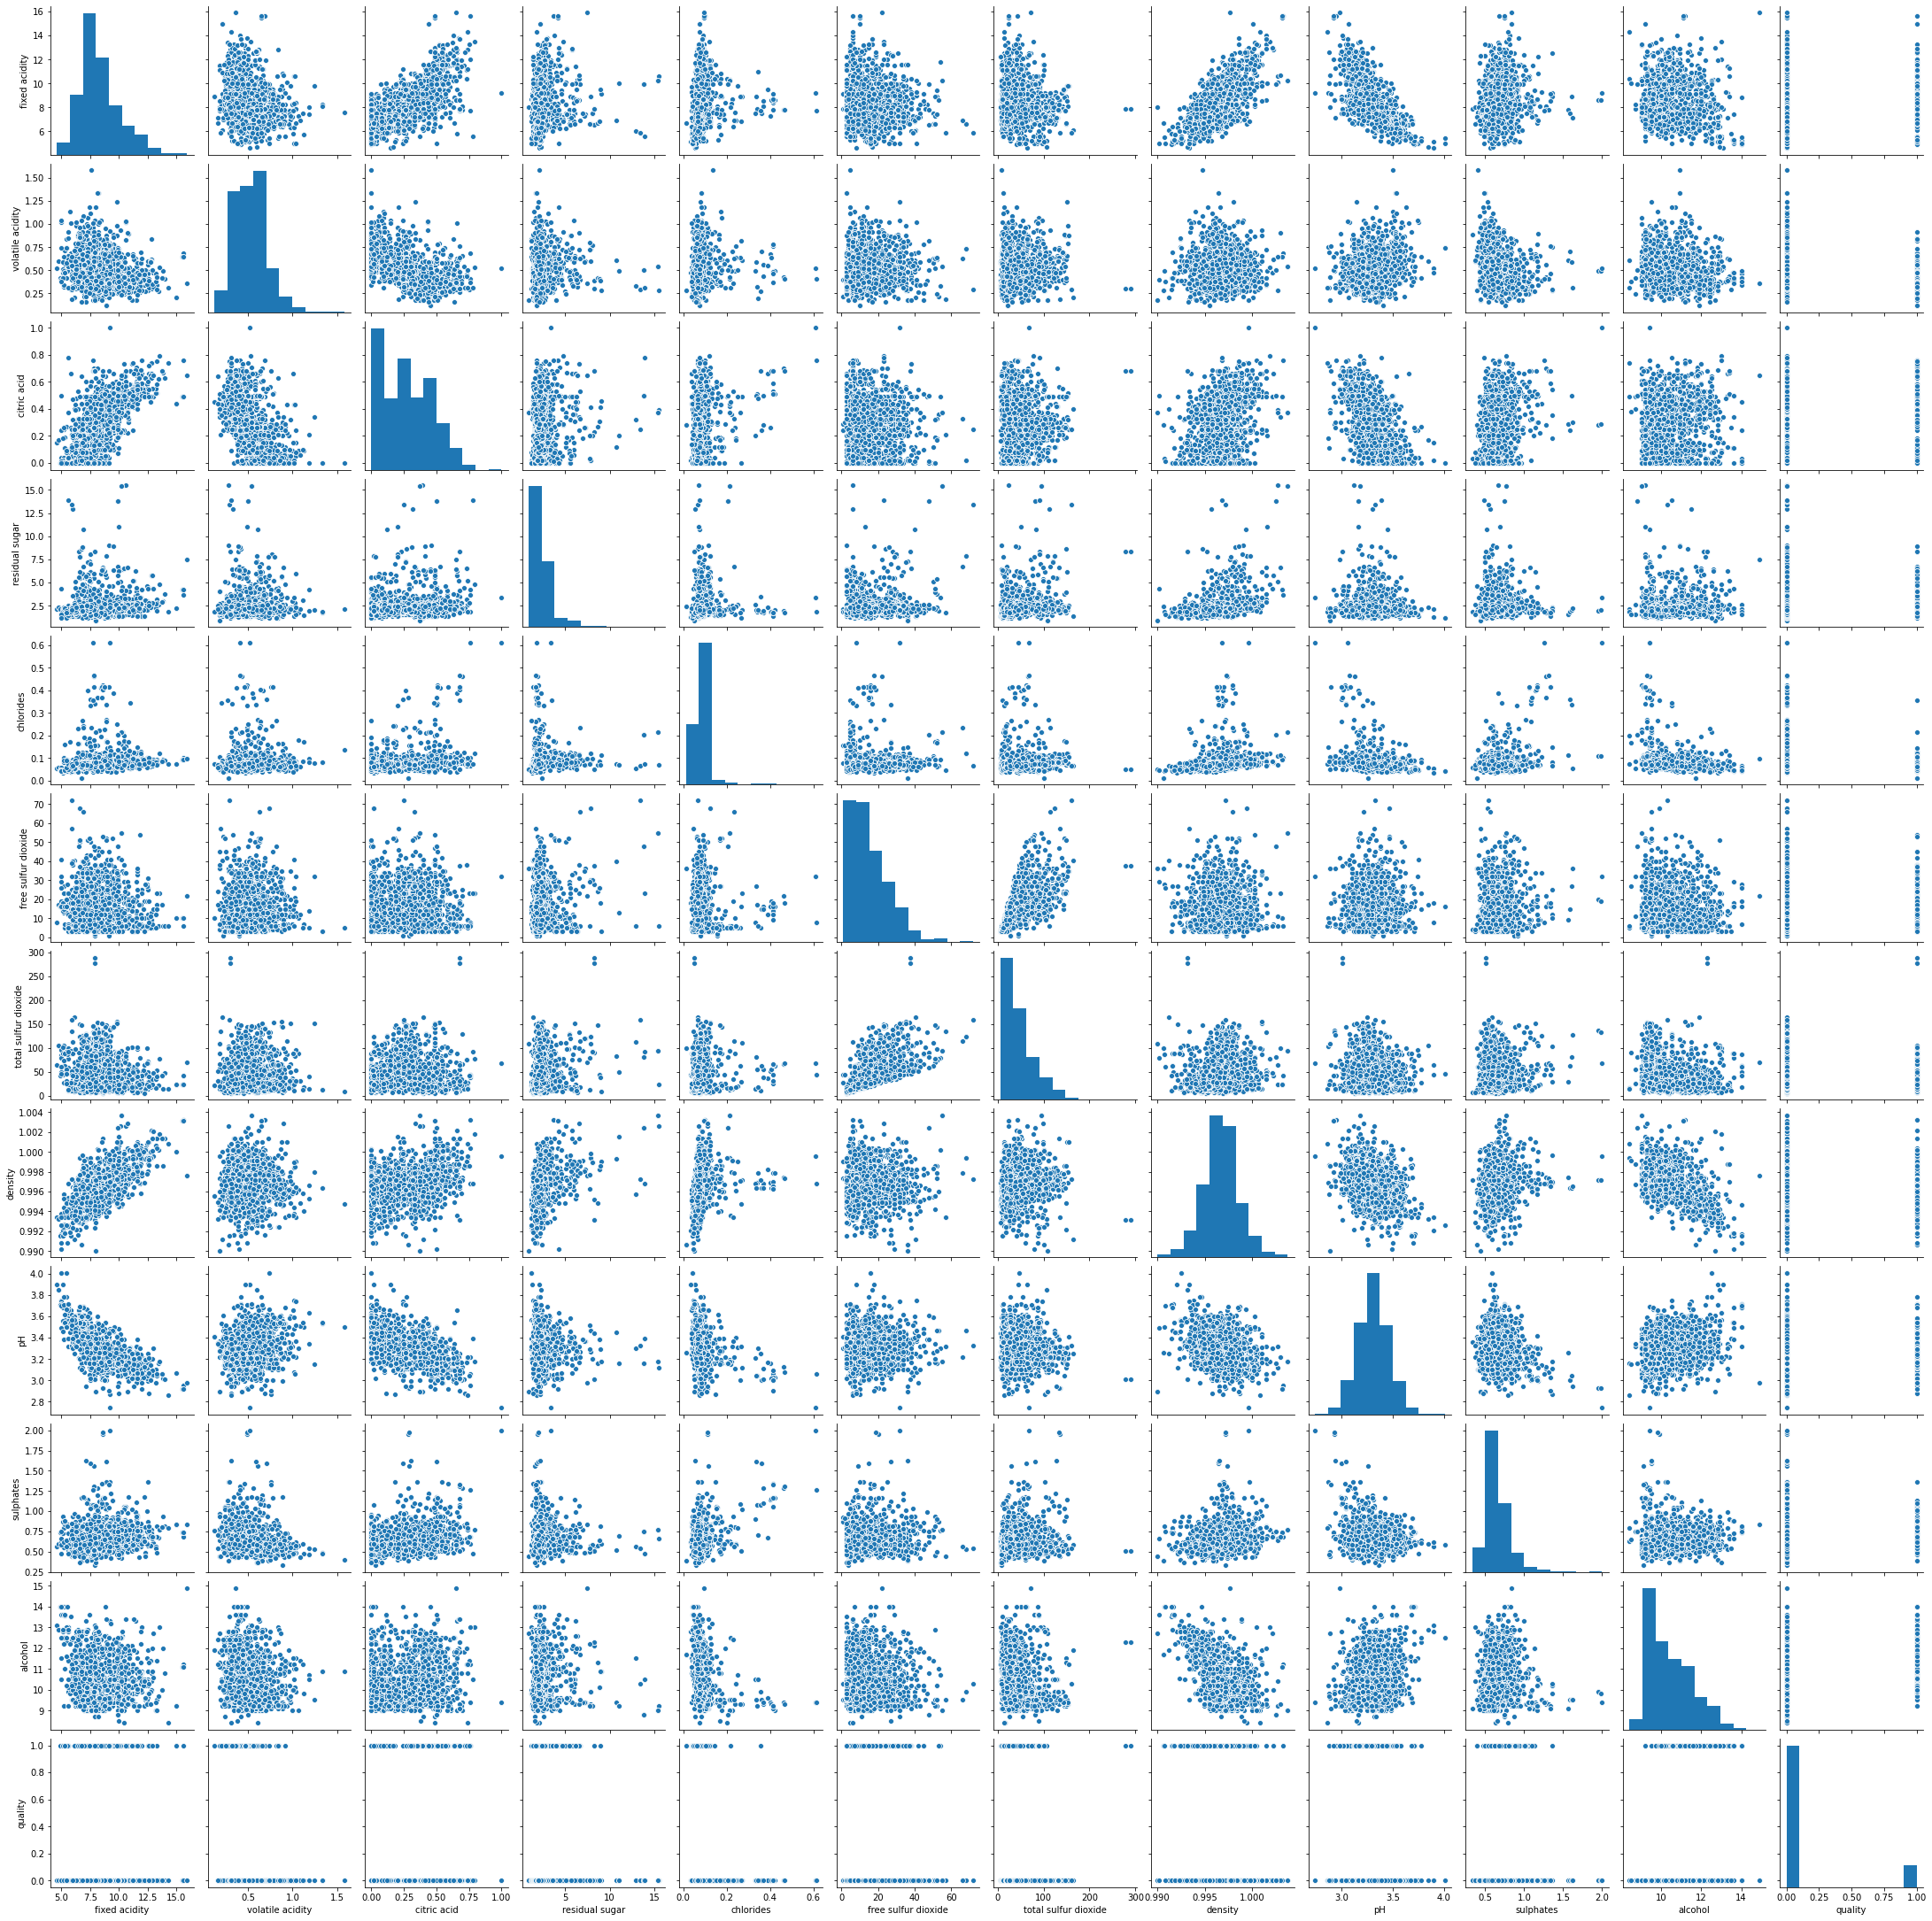

In [17]:
#Checking normal distribution of each column
sns.pairplot(rw) 
plt.show

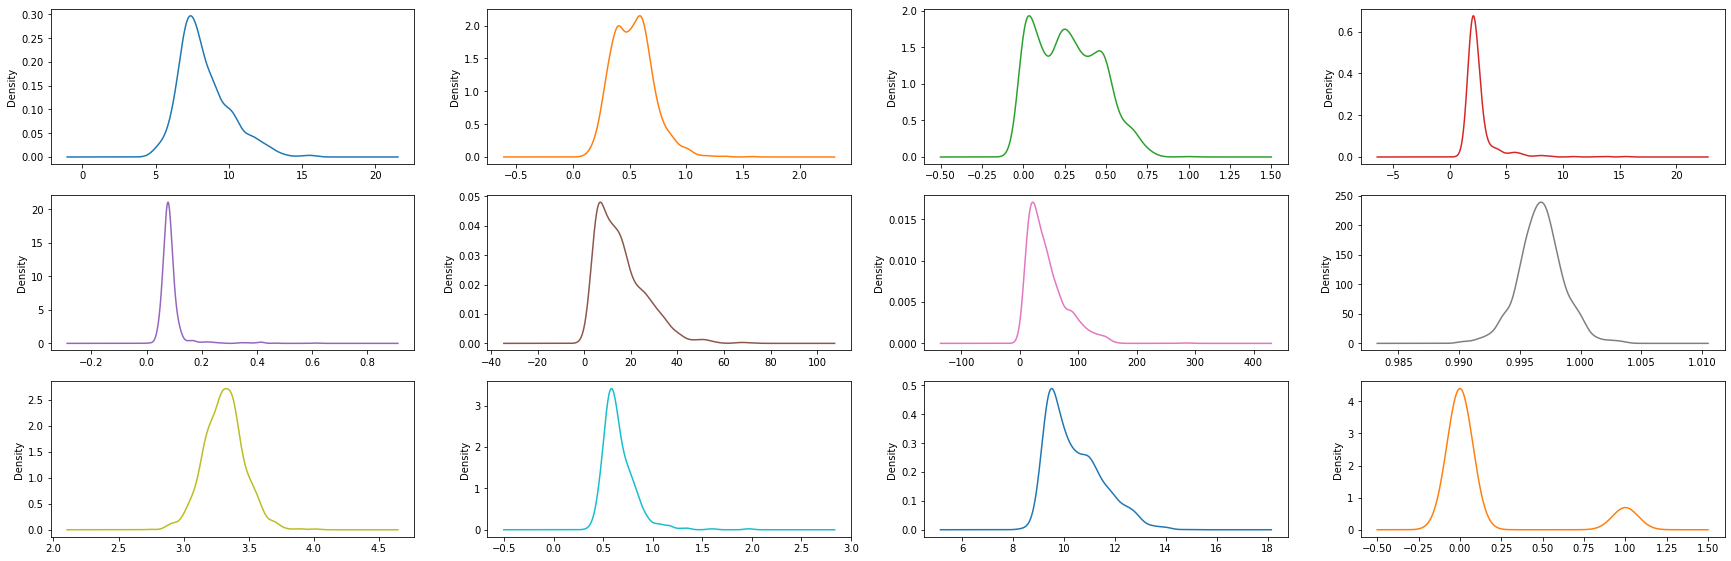

In [18]:
#Checking normal distribution of each column
rw.plot(kind='density',subplots=True, layout=(6,4), sharex=False, legend=False, figsize=[30,20])
plt.show()

Observation: In above plot we observe most of the columns are normal distributed and few are postively skewed.

In [19]:
#checking skewness
rw.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

### Checking Correlation

Here we use statistical method which is used to evaluate the strength of bonding of the relationship between two quantitative variables.

In [20]:
#Checking Correlation
rw.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


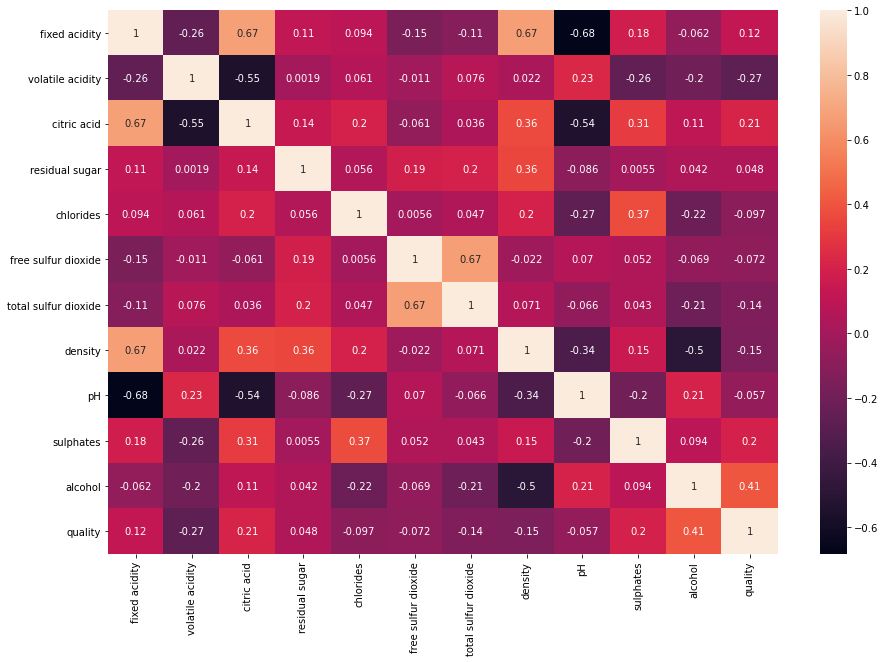

In [21]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(rw.corr(),annot=True)
plt.show()

Observation: pH, density, Free sulfur dioxide, residual sugar are less correlated with quality

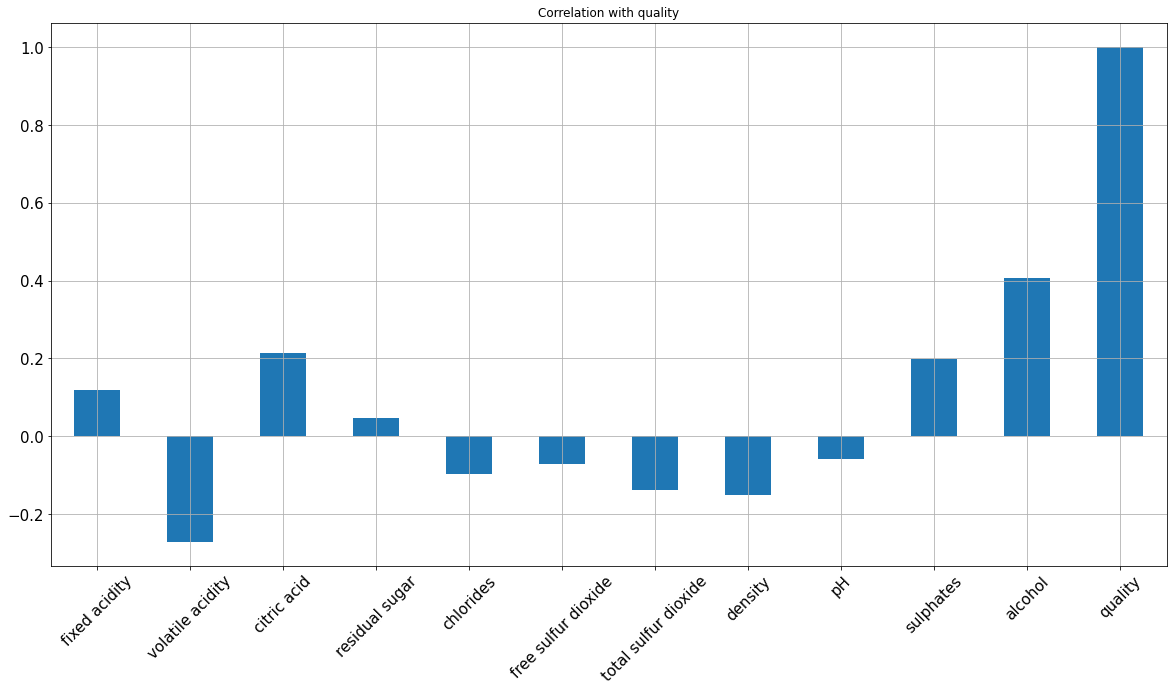

In [22]:
rw.corrwith(rw.quality).plot.bar(figsize = (20, 10), title = "Correlation with quality", fontsize = 15, rot = 45,
                                     grid = True)

Here we can see that independent variables are positively and negatively correlated with dependent variable.

# Checking Outliers using Boxplot

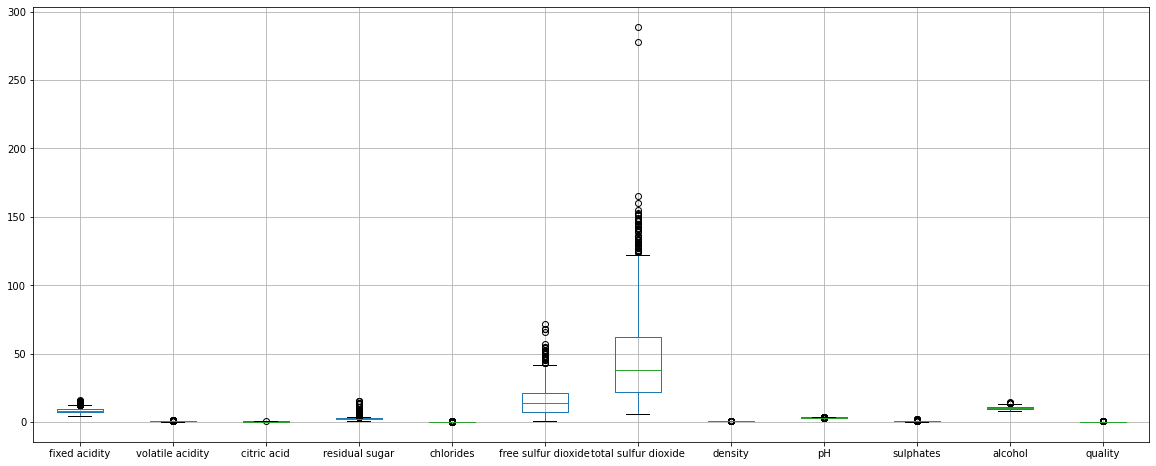

In [23]:
rw.boxplot(figsize=[20,8])

Here we observe there are outliers in each column

#### Ploting boxplot for each column

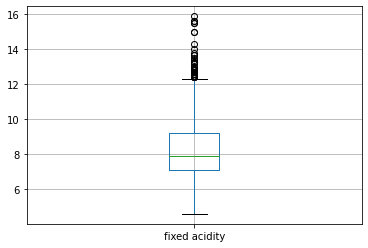

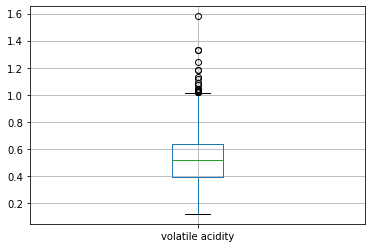

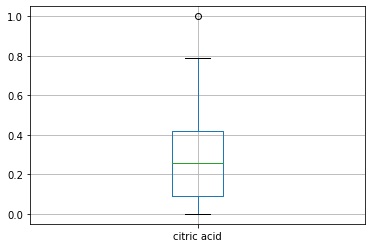

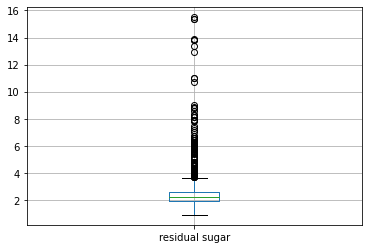

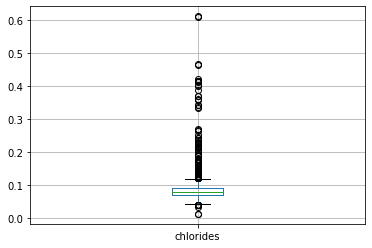

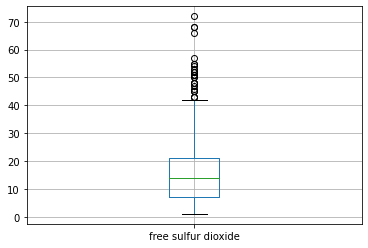

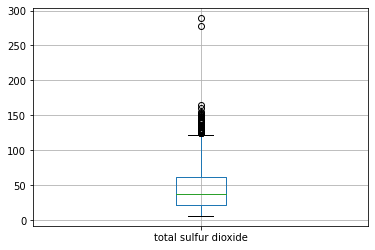

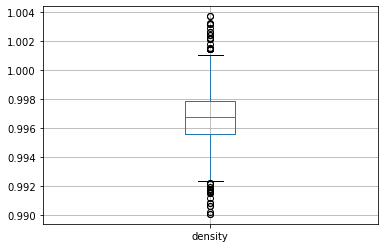

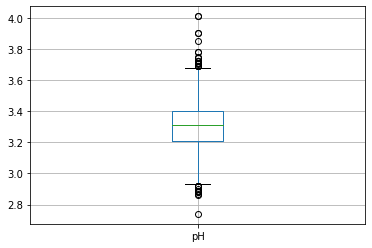

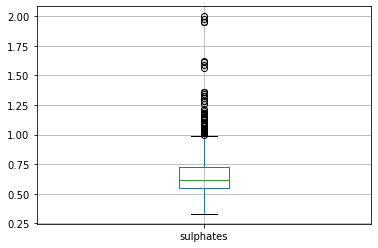

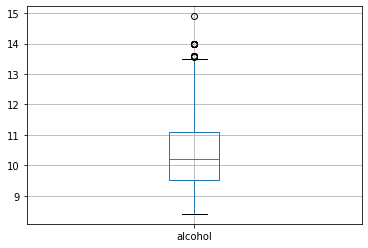

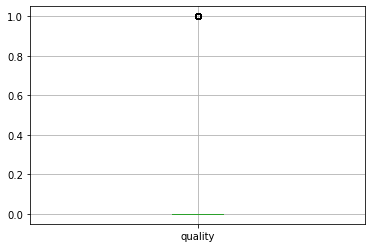

In [24]:
#used this code from google
for i in rw.columns:
    rw.boxplot(column=i)
    plt.show()

In above individual boxplot we can clearly observe there are outliers in each column.Lets deal with outliers

### Removing Outliers

In [25]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(rw))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [26]:
new_rw=rw[(z<3).all(axis=1)]
new_rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [27]:
rw.shape

(1599, 12)

In [28]:
new_rw.shape

(1458, 12)

In [29]:
percentage_loss=((1599-1458)/1599)*100
print(percentage_loss)

8.818011257035648


In [30]:
#removing outliers using IQR
Q1=rw.quantile(0.25)
Q3=rw.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  0.000000
dtype: float64


In [31]:
new_rw1=rw[~((rw<Q1-(1.5*IQR))|(rw>(Q3+(1.5*IQR)))).any(axis=1)]
new_rw1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [32]:
percentage_loss=((1599-1047)/1599)*100
print(percentage_loss)

34.52157598499062


### Splitting the independent and target variables in x and y

In [33]:
x=rw.drop('quality',axis=1)
y=rw["quality"]

In [34]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [35]:
# Next we will apply standard scaling
# standard scaling allows us to normalize all of the data such that the distribution will have a mean value of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Finding best Random state 

Here we find the random state which we will use to build the model.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.9104166666666667 n Random_state 86


### Creating train_test_split

We will apply multiple Classification models for checking the accuracy score, confusion matrix, classification.

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=86)

In [40]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]


for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"accuracy_score", accuracy_score(y_test,pred))

LogisticRegression() accuracy_score 0.9104166666666667
SVC() accuracy_score 0.9083333333333333
GaussianNB() accuracy_score 0.8583333333333333
DecisionTreeClassifier() accuracy_score 0.8625
KNeighborsClassifier() accuracy_score 0.8833333333333333
RandomForestClassifier() accuracy_score 0.925
AdaBoostClassifier() accuracy_score 0.8833333333333333
GradientBoostingClassifier() accuracy_score 0.90625
BaggingClassifier() accuracy_score 0.9145833333333333


Above model we observe that RandomForestClassifier has good accuracy score.

In [41]:
for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"confusion_matrix\n",confusion_matrix(y_test,pred))

LogisticRegression() confusion_matrix
 [[411   7]
 [ 36  26]]
SVC() confusion_matrix
 [[415   3]
 [ 41  21]]
GaussianNB() confusion_matrix
 [[370  48]
 [ 20  42]]
DecisionTreeClassifier() confusion_matrix
 [[383  35]
 [ 30  32]]
KNeighborsClassifier() confusion_matrix
 [[395  23]
 [ 33  29]]
RandomForestClassifier() confusion_matrix
 [[411   7]
 [ 31  31]]
AdaBoostClassifier() confusion_matrix
 [[395  23]
 [ 33  29]]
GradientBoostingClassifier() confusion_matrix
 [[403  15]
 [ 30  32]]
BaggingClassifier() confusion_matrix
 [[401  17]
 [ 32  30]]


In [42]:
for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"classification_report\n",classification_report(y_test,pred))

LogisticRegression() classification_report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       418
           1       0.79      0.42      0.55        62

    accuracy                           0.91       480
   macro avg       0.85      0.70      0.75       480
weighted avg       0.90      0.91      0.90       480

SVC() classification_report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       418
           1       0.88      0.34      0.49        62

    accuracy                           0.91       480
   macro avg       0.89      0.67      0.72       480
weighted avg       0.91      0.91      0.89       480

GaussianNB() classification_report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       418
           1       0.47      0.68      0.55        62

    accuracy                           0.86       480
   macro avg       

### Checking Cross Validation Score

Here we check cross validation score to find the best model

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    print("Cross Validation Score for",models[model],scr.mean())

Cross Validation Score for LogisticRegression() 0.8674275078369906
Cross Validation Score for SVC() 0.8692927115987461
Cross Validation Score for GaussianNB() 0.8067985893416928
Cross Validation Score for DecisionTreeClassifier() 0.8017535266457679
Cross Validation Score for KNeighborsClassifier() 0.8417848746081505
Cross Validation Score for RandomForestClassifier() 0.8661755485893418
Cross Validation Score for AdaBoostClassifier() 0.8580387931034483
Cross Validation Score for GradientBoostingClassifier() 0.8680466300940439
Cross Validation Score for BaggingClassifier() 0.8624079153605015


***Minimum difference in accuracy and cross validation score is for AdaBoostClassifier. So AdaBoostClassifier is our best model***

### Hyper Tuning the Model

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
#creating parameter list to pass in GridSearchCV

parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}

In [47]:
ABC=GridSearchCV(AdaBoostClassifier(),parameters,cv=5) #Tuning DecisionTreeClassifier

In [48]:
ABC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'n_estimators': range(5, 20),
                         'random_state': range(20, 40)})

In [49]:
ABC.best_params_ #finding the best parameters for AdaBoost hyper tuning

{'algorithm': 'SAMME', 'n_estimators': 13, 'random_state': 20}

In [50]:
mod=AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 13,random_state=20)
mod.fit(x_train,y_train)

pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

89.375


After Hyper tuning the accuracy score is 89.

### AUC RUC Curve

In [51]:
from sklearn.metrics import plot_roc_curve

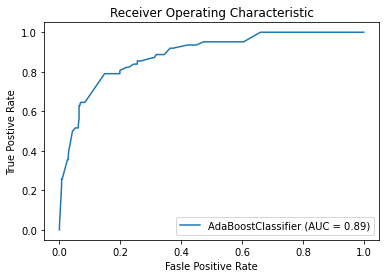

In [52]:
plot_roc_curve(mod,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,precision_score

In [54]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)  
AS=accuracy_score(y_test,pre)
sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
recall = recall_score(y_test,pre, average='binary')
precision = precision_score(y_test,pre, average='binary')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
cm=confusion_matrix(y_test,pre)

print('Accuracy_score =',AS)
    

print('Cross_Val_Score =',sc)
    

print('Recall =', recall)
   

print('Precision: %.3f' % precision)
    

print('roc_auc_score= ',roc_auc)

    
print('classification_report\n',classification_report(y_test,pre))
    

print('confusion matrix\n',cm)

AdaBoostClassifier()
Accuracy_score = 0.8833333333333333
Cross_Val_Score = 0.863054245283019
Recall = 0.46774193548387094
Precision: 0.558
roc_auc_score=  0.7063590060194475
classification_report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       418
           1       0.56      0.47      0.51        62

    accuracy                           0.88       480
   macro avg       0.74      0.71      0.72       480
weighted avg       0.88      0.88      0.88       480

confusion matrix
 [[395  23]
 [ 33  29]]


### Saving a Model

In [55]:
import pickle
filename = 'Red Wine Quality Project.pkl'
pickle.dump(ABC,open(filename,'wb'))

### Conclusion

In [56]:
Final=np.array(y_test)
Final

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
predict=np.array(ABC.predict(x_test))

In [58]:
rw_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))

In [59]:
rw_pred

,original,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
475,0,0
476,0,0
477,0,0
478,0,0


***Above table is the original Quality and predicted Quality of Red Wine***

According to our output, we saw that the original testing values are as much similar to our RandomForestClassifier model predicted values. Here 1 represents the quality greater than 0.7 which is considered in good quality wine and 0 represents the quality below 6.5 which is not considered as a good quality wine. 

In [60]:
rw_pred['predicted'].value_counts()

0    445
1     35
Name: predicted, dtype: int64